Original: 1024x512, Channels: 3
Loading model...

0: 640x640 1 Off_Platform, 197.9ms
Speed: 3.7ms preprocess, 197.9ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 640)

      DETECTION RESULTS
-> Found: Off_Platform (55.0% confidence)


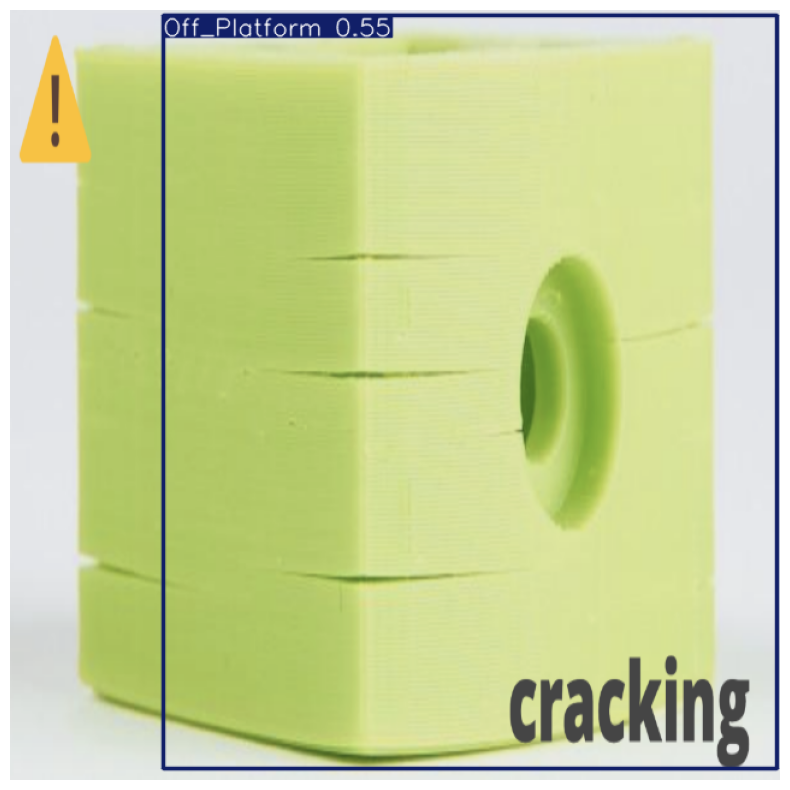

In [ ]:
import cv2
import os , time
import matplotlib.pyplot as plt  
from ultralytics import YOLO

# ==========================================
# CONFIGURATION
# ==========================================
MODEL_PATH = r"/home/aipc/Desly/DefectClassification/fdm_manual_training/yolov5m6u/weights/last.pt"
IMAGE_PATH = r"/home/aipc/Desly/DefectClassification/pictures/Crack.png"

# ==========================================
# EXECUTION
# ==========================================
def run_inference():
    # Check paths first
    if not os.path.exists(MODEL_PATH):
        print(f"❌ Error: Model not found at {MODEL_PATH}")
        return
    if not os.path.exists(IMAGE_PATH):
        print(f"❌ Error: Image not found at {IMAGE_PATH}")
        return

    # 1. Load Image
    img = cv2.imread(IMAGE_PATH)
    height, width, channels = img.shape
    print(f"Original: {width}x{height}, Channels: {channels}")

    # Resize (Optional, but good for consistency)
    resized_img = cv2.resize(img, (640, 640))

    # 2. Load Model & Predict
    print(f"Loading model...")
    model = YOLO(MODEL_PATH)
    results = model.predict(resized_img, conf=0.25, save=False) # save=False to avoid clutter
    result = results[0]

    # 3. Print Text Results
    print("\n" + "="*30)
    print("      DETECTION RESULTS")
    print("="*30)

    if len(result.boxes) == 0:
        print("No defects detected.")
    else:
        for box in result.boxes:
            class_id = int(box.cls[0])
            class_name = model.names[class_id]
            conf = float(box.conf[0])
            print(f"-> Found: {class_name} ({conf:.1%} confidence)")

    # 4. DISPLAY THE IMAGE (The Fix)
    
    annotated_frame_bgr = result.plot()

    # Convert BGR to RGB so Matplotlib displays colors correctly
    # (Otherwise blue and red will be swapped)
    annotated_frame_rgb = cv2.cvtColor(annotated_frame_bgr, cv2.COLOR_BGR2RGB)

    
    plt.figure(figsize=(5, 5)) # Make it big enough to see
    plt.imshow(annotated_frame_rgb)
    plt.axis('off') 
    plt.show()

# Run it
run_inference()